# 🏥 Medical Insurance Cost Analysis (Python • Pandas • Seaborn)

This project analyzes how demographic and lifestyle variables influence U.S. medical insurance charges using the well-known **Insurance Dataset**.

The goal is to explore the impact of:
- **Smoking status**
- **BMI and BMI categories**
- **Sex**
- **Region**
on insurance costs.

### 🔧 Tools Used
- **Python:** Pandas, NumPy  
- **Visualization:** Matplotlib, Seaborn  
- **Skills Demonstrated:**  
  - Data cleaning  
  - Feature engineering  
  - Groupby summarization  
  - Healthcare cost insights  
  - Visualization & storytelling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

## 1. Load Data

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Data Overview
Check dataset size, structure, and basic statistics.

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

## 3. Data Cleaning and Feature Engineering
- Remove duplicate rows  
- Standardize column names  
- Create BMI categories (underweight / normal / overweight / obese)

In [ ]:
# 1) Remove duplicate row
df = df.drop_duplicates()
df.shape

(1337, 7)

In [ ]:
# 2) Clean column names: strip spaces, make lowercase
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# 3) Create BMI category bands
bins =[0, 18.5, 25, 30, 100]
labels = ["underweight", "normal", "overweight", "obese"]

df["bmi_band"] = pd.cut(df["bmi"], bins=bins, labels=labels, right=False)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_band
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


## 4. Descriptive Analysis (Groupby)
We summarize average charges by key risk factors.

In [ ]:
df.groupby("smoker")["charges"].mean().round(2)

smoker
no      8440.66
yes    32050.23
Name: charges, dtype: float64

In [ ]:
df.groupby("region")["charges"].mean().round(2).sort_values(ascending=False)

region
southeast    14735.41
northeast    13406.38
northwest    12450.84
southwest    12346.94
Name: charges, dtype: float64

In [ ]:
df.groupby("bmi_band")["charges"].mean().round(2).sort_values(ascending=False)

bmi_band
obese          15572.04
overweight     10987.51
normal         10409.34
underweight     8852.20
Name: charges, dtype: float64

In [ ]:
df.groupby("sex")["charges"].mean().round(2)

sex
female    12569.58
male      13975.00
Name: charges, dtype: float64

In [ ]:
# Charges by smoker and sex
charges_smoker_sex = (
    df.groupby(["smoker", "sex"])["charges"]
      .agg(["count", "mean", "median"])
      .round(2)
      .reset_index()
)
charges_smoker_sex

,smoker,sex,count,mean,median
0,no,female,547,8762.30,7639.42
1,no,male,516,8099.70,6986.10
2,yes,female,115,30679.00,28950.47
3,yes,male,159,33042.01,36085.22


In [ ]:
# Charges by BMI band and smoker
charges_bmi_smoker = (
    df.groupby(["bmi_band", "smoker"])["charges"]
      .agg(["count", "mean", "median"])
      .round(2)
      .reset_index()
      .sort_values(["bmi_band", "smoker"])
)
charges_bmi_smoker

,bmi_band,smoker,count,mean,median
0,underweight,no,15,5532.99,3732.63
1,underweight,yes,5,18809.82,15006.58
2,normal,no,175,7685.66,6593.51
3,normal,yes,50,19942.22,19479.90
4,overweight,no,312,8257.96,7063.92
5,overweight,yes,74,22495.87,21215.43
6,obese,no,561,8855.53,8083.92
7,obese,yes,145,41557.99,40904.20


In [ ]:
# Charges by region
charges_region = (
    df.groupby("region")["charges"]
      .agg(["count", "mean", "median"])
      .round(2)
      .reset_index()
      .sort_values("mean", ascending=False)
)
charges_region

,region,count,mean,median
2,southeast,364,14735.41,9294.13
0,northeast,324,13406.38,10057.65
1,northwest,324,12450.84,8976.98
3,southwest,325,12346.94,8798.59


## 5. Visualizations
We visualize how smoking status and BMI categories relate to insurance charges.

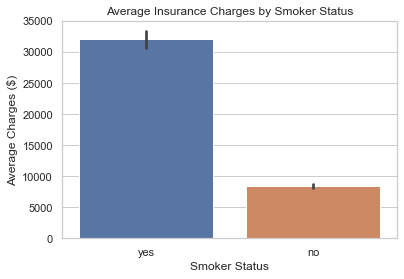

In [ ]:
import numpy as np  # in case not already imported elsewhere

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="smoker", y="charges")
plt.title("Average Insurance Charges by Smoker Status")
plt.xlabel("Smoker Status")
plt.ylabel("Average Charges ($)")
plt.show()

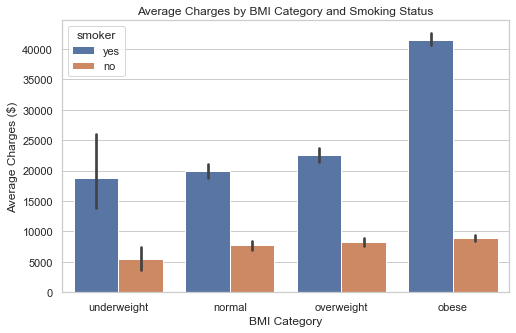

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="bmi_band", y="charges", hue="smoker")
plt.title("Average Charges by BMI Category and Smoking Status")
plt.xlabel("BMI Category")
plt.ylabel("Average Charges ($)")
plt.show()

# 📌 Final Summary & Key Insights

### 1. Smoking is the strongest cost driver.
Smokers pay **3–4× higher average charges** than non-smokers.  
This is consistent across all BMI categories.

### 2. BMI strongly impacts medical costs.
Obese beneficiaries show the **highest average charges**, followed by overweight individuals.

### 3. Combining obesity + smoking creates the highest risk group.
Obese smokers incur the largest medical cost burden.

### 4. Regional differences exist.
The **Southeast** has the highest average charges, while the Southwest is lower.

### 5. Sex differences are modest.
Males have slightly higher average charges compared to females.

---

## What This Project Demonstrates
- Ability to clean and structure raw data  
- Use of pandas groupby and aggregations  
- Creating features (BMI categories)  
- Data storytelling with visualizations  
- Extracting meaningful healthcare insights

In [ ]:
import os
os.makedirs("outputs", exist_ok=True)

df.to_csv("outputs/insurance_clean.csv", index=False)
charges_smoker_sex.to_csv("outputs/charges_smoker_sex.csv", index=False)
charges_bmi_smoker.to_csv("outputs/charges_bmi_smoker.csv", index=False)
charges_region.to_csv("outputs/charges_region.csv", index=False)